In [31]:
import pandas as pd
import numpy as np
import joblib

from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [32]:
iso_df = pd.read_csv(r"C:\Users\Athul VR\OneDrive\Desktop\ML Model\featuring\isodata_final.csv")
rf_df = pd.read_csv(r"C:\Users\Athul VR\OneDrive\Desktop\ML Model\featuring\randomdata_final.csv")

print("Isolation Data Shape:", iso_df.shape)
print("RF Data Shape:", rf_df.shape)

Isolation Data Shape: (1050, 15)
RF Data Shape: (1050, 16)


In [33]:
FEATURES = [
    "mean_cpu",
    "std_cpu",
    "min_cpu",
    "max_cpu",
    "delta_cpu",
    "cpu_trend",
    "cpu_volatility",
    "mean_memory",
    "std_memory",
    "memory_trend",
    "mean_requests",
    "request_spike_count",
    "throughput_delta",
    "cost_delta",
    "unit_economics_ratio"
]

In [34]:
X_iso = iso_df[FEATURES]

iso_model = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42
)

iso_model.fit(X_iso)

print(" Isolation Forest Trained")

 Isolation Forest Trained


In [35]:
iso_preds = iso_model.predict(X_iso)

normal_count = np.sum(iso_preds == 1)
anomaly_count = np.sum(iso_preds == -1)

print("Normal:", normal_count)
print("Anomalies:", anomaly_count)

Normal: 997
Anomalies: 53


In [36]:



import numpy as np

def get_anomaly_score(model, X):

    raw_score = model.decision_function(X)

    # Convert to 0-1 risk scale
    risk_score = 1 - (raw_score - raw_score.min()) / (raw_score.max() - raw_score.min() + 1e-9)

    return risk_score

In [37]:
joblib.dump(iso_model, "isolation_forest_model.pkl")

print("Isolation Model Saved")

Isolation Model Saved


In [38]:
X_rf = rf_df[FEATURES]
y_rf = rf_df["incident_type"]

X_train, X_test, y_train, y_test = train_test_split(
    X_rf,
    y_rf,
    test_size=0.2,
    random_state=42,
    stratify=y_rf
)

In [39]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    class_weight="balanced",
    random_state=42
)

rf_model.fit(X_train, y_train)

print("Random Forest Trained")

Random Forest Trained


In [40]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

   BadDeploy       1.00      1.00      1.00        42
  MemoryLeak       1.00      1.00      1.00        47
      Normal       1.00      1.00      1.00        82
TrafficSpike       1.00      1.00      1.00        39

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [41]:
def get_rf_prediction_with_confidence(model, X):

    pred = model.predict(X)[0]

    probs = model.predict_proba(X)[0]
    confidence = np.max(probs)

    return pred, confidence

In [42]:
def generate_indicators(features):

    indicators = []

    if features["mean_cpu"] > 70:
        indicators.append("Elevated CPU usage")

    if features["cpu_volatility"] > 0.5:
        indicators.append("Unstable CPU pattern")

    if features["request_spike_count"] > 3:
        indicators.append("Traffic spike detected")

    if features["memory_trend"] > 0.5:
        indicators.append("Memory rising trend")

    if len(indicators) == 0:
        indicators.append("No major signals")

    return indicators

In [43]:
joblib.dump(rf_model, "random_forest_model.pkl")

print("Random Forest Model Saved")

Random Forest Model Saved


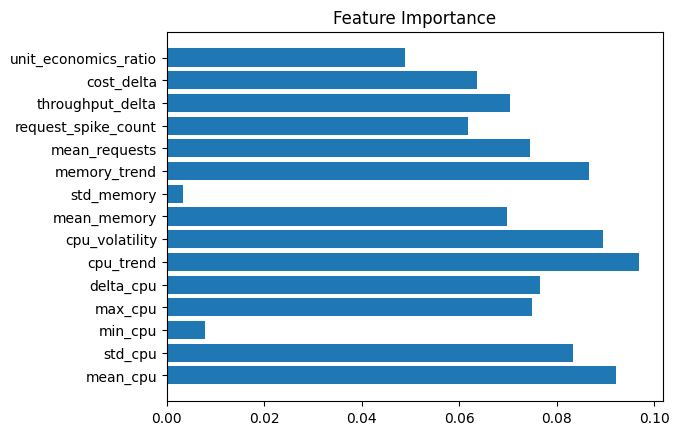

In [44]:
import matplotlib.pyplot as plt

importance = rf_model.feature_importances_

plt.figure()
plt.barh(FEATURES, importance)
plt.title("Feature Importance")
plt.show()